# **Data Collection**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\MACHINE LEARNING\DATASET\Used Cars\toyota.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# **Data Understanding**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### **EDA - Handling Outliers:**


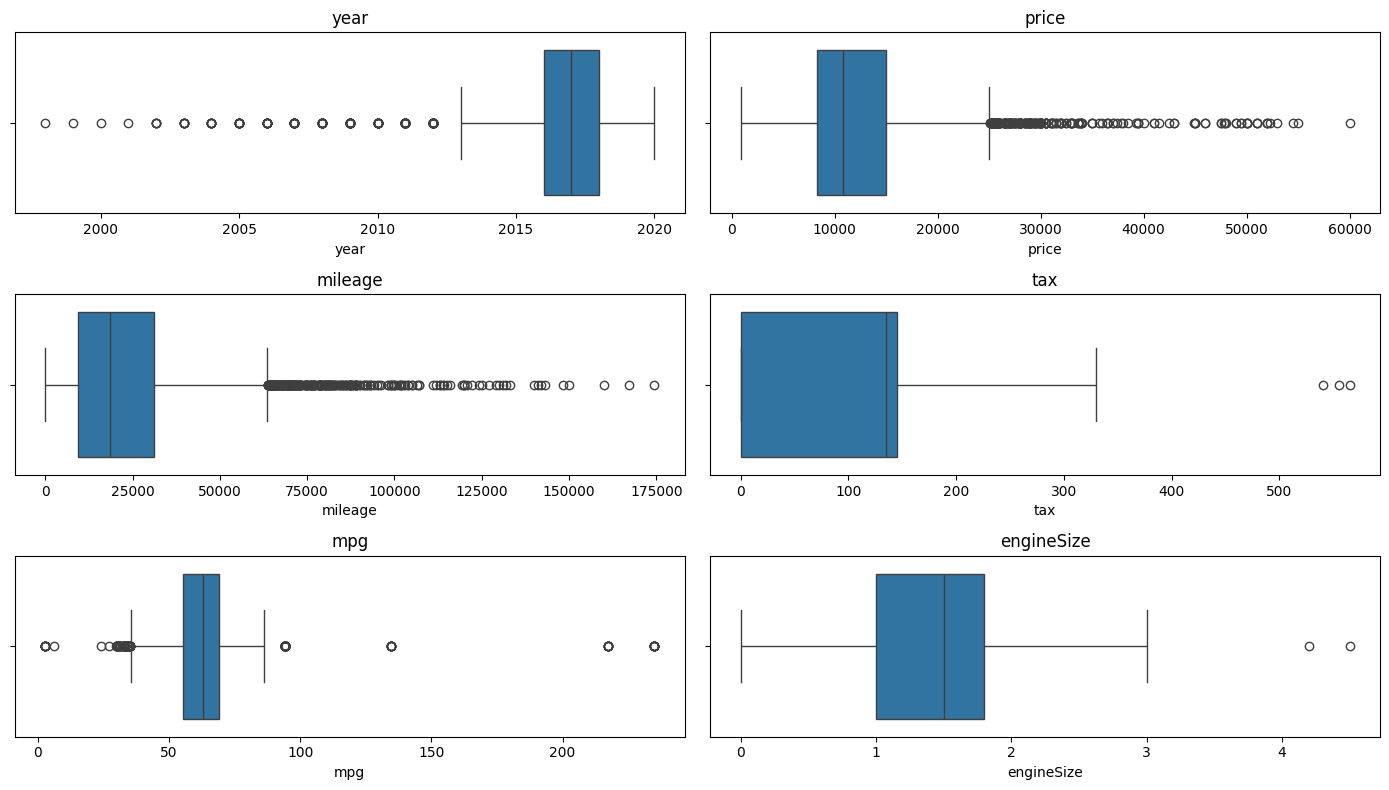

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_features = df.select_dtypes(include=["int", "float"]).columns.tolist()

# Calculate the number of rows needed
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

# Plotting box plots for all numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [9]:
print("Shape of the dataset after before outliers:", df.shape)

# Calculate Q1, Q3, and IQR for numerical features only
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers for numerical features only
df = df[
    ~(
        (df[numerical_features] < (Q1 - 1.5 * IQR))
        | (df[numerical_features] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

# Check the size of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", df.shape)

Shape of the dataset after before outliers: (6738, 9)
Shape of the dataset after removing outliers: (6015, 9)


### **EDA - Univariate Analysis**


In [10]:
# Assuming df is your DataFrame
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

In [11]:
categorical_features

['model', 'transmission', 'fuelType']

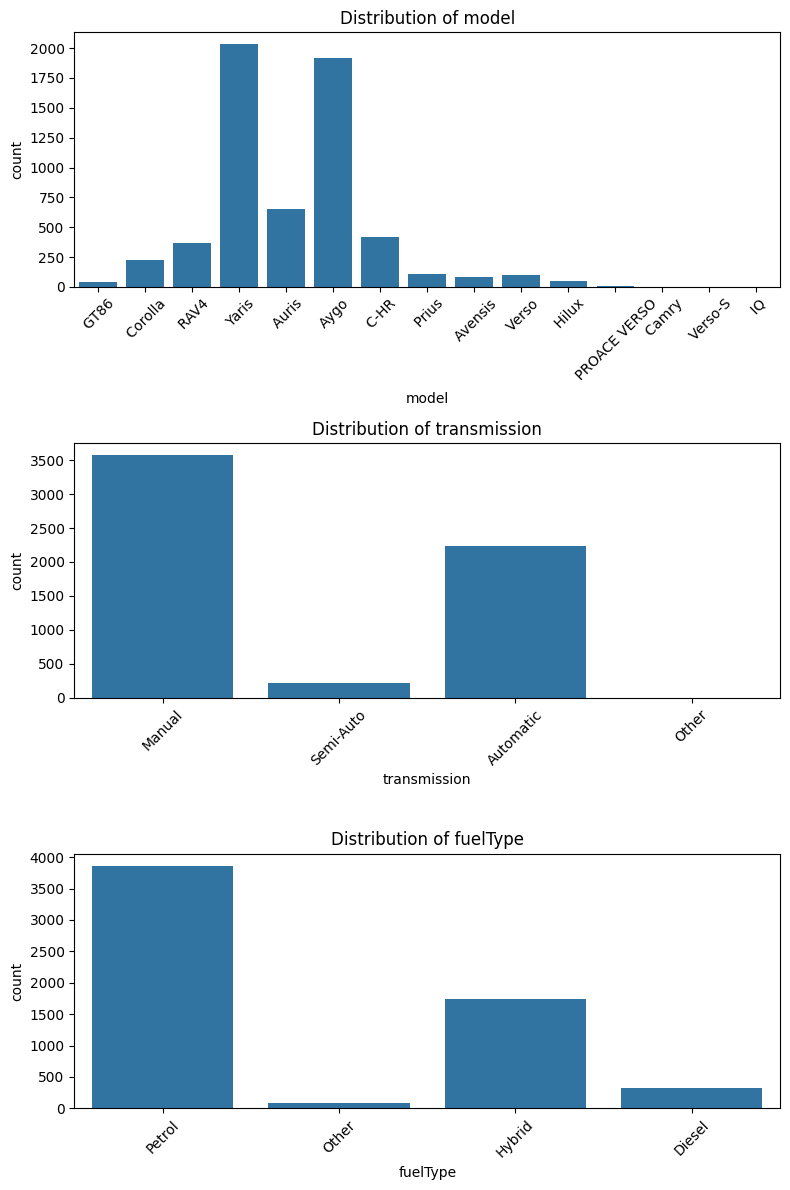

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for subplots
num_features = len(categorical_features)
num_cols = 1  # Two columns for better visualization
num_rows = 3

# Distribution of Categories
plt.figure(figsize=(8, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **EDA - Multivariate Analysis**


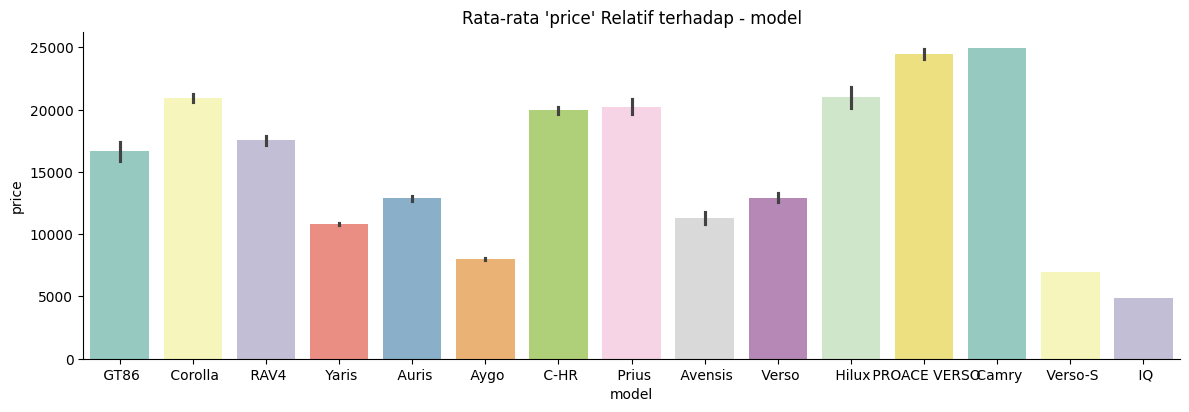

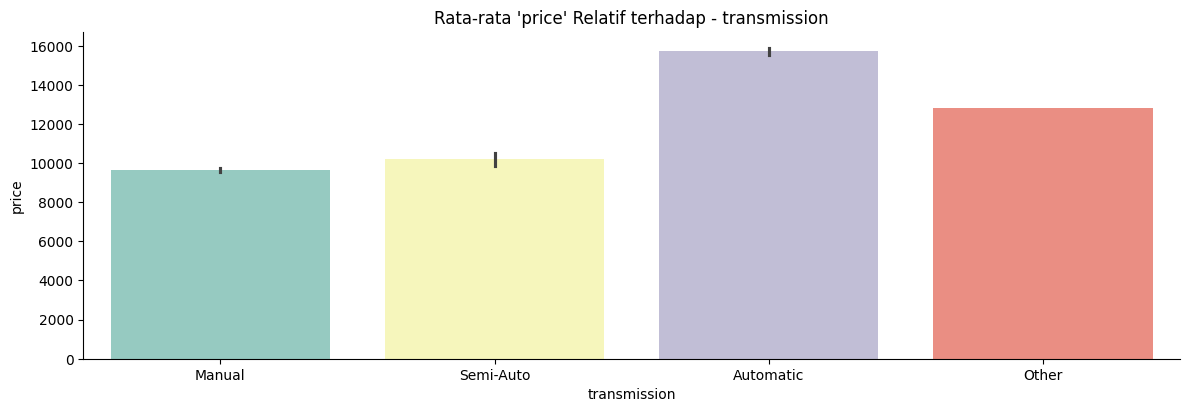

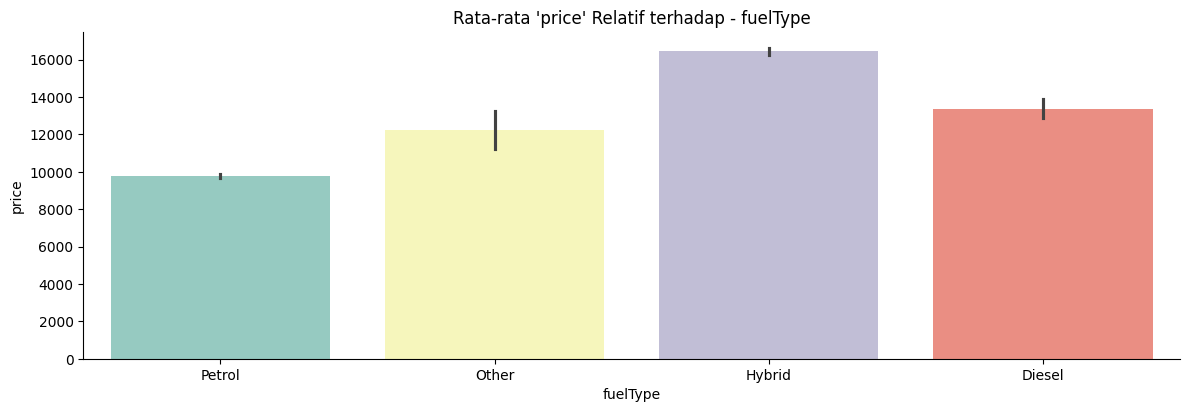

In [13]:
for col in categorical_features:
    sns.catplot(
        x=col,
        y="price",
        hue=col,
        kind="bar",
        dodge=False,
        height=4,
        aspect=3,
        data=df,
        palette="Set3",
        legend=False,  # Set legend to False for the same effect
    )
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
    plt.show()

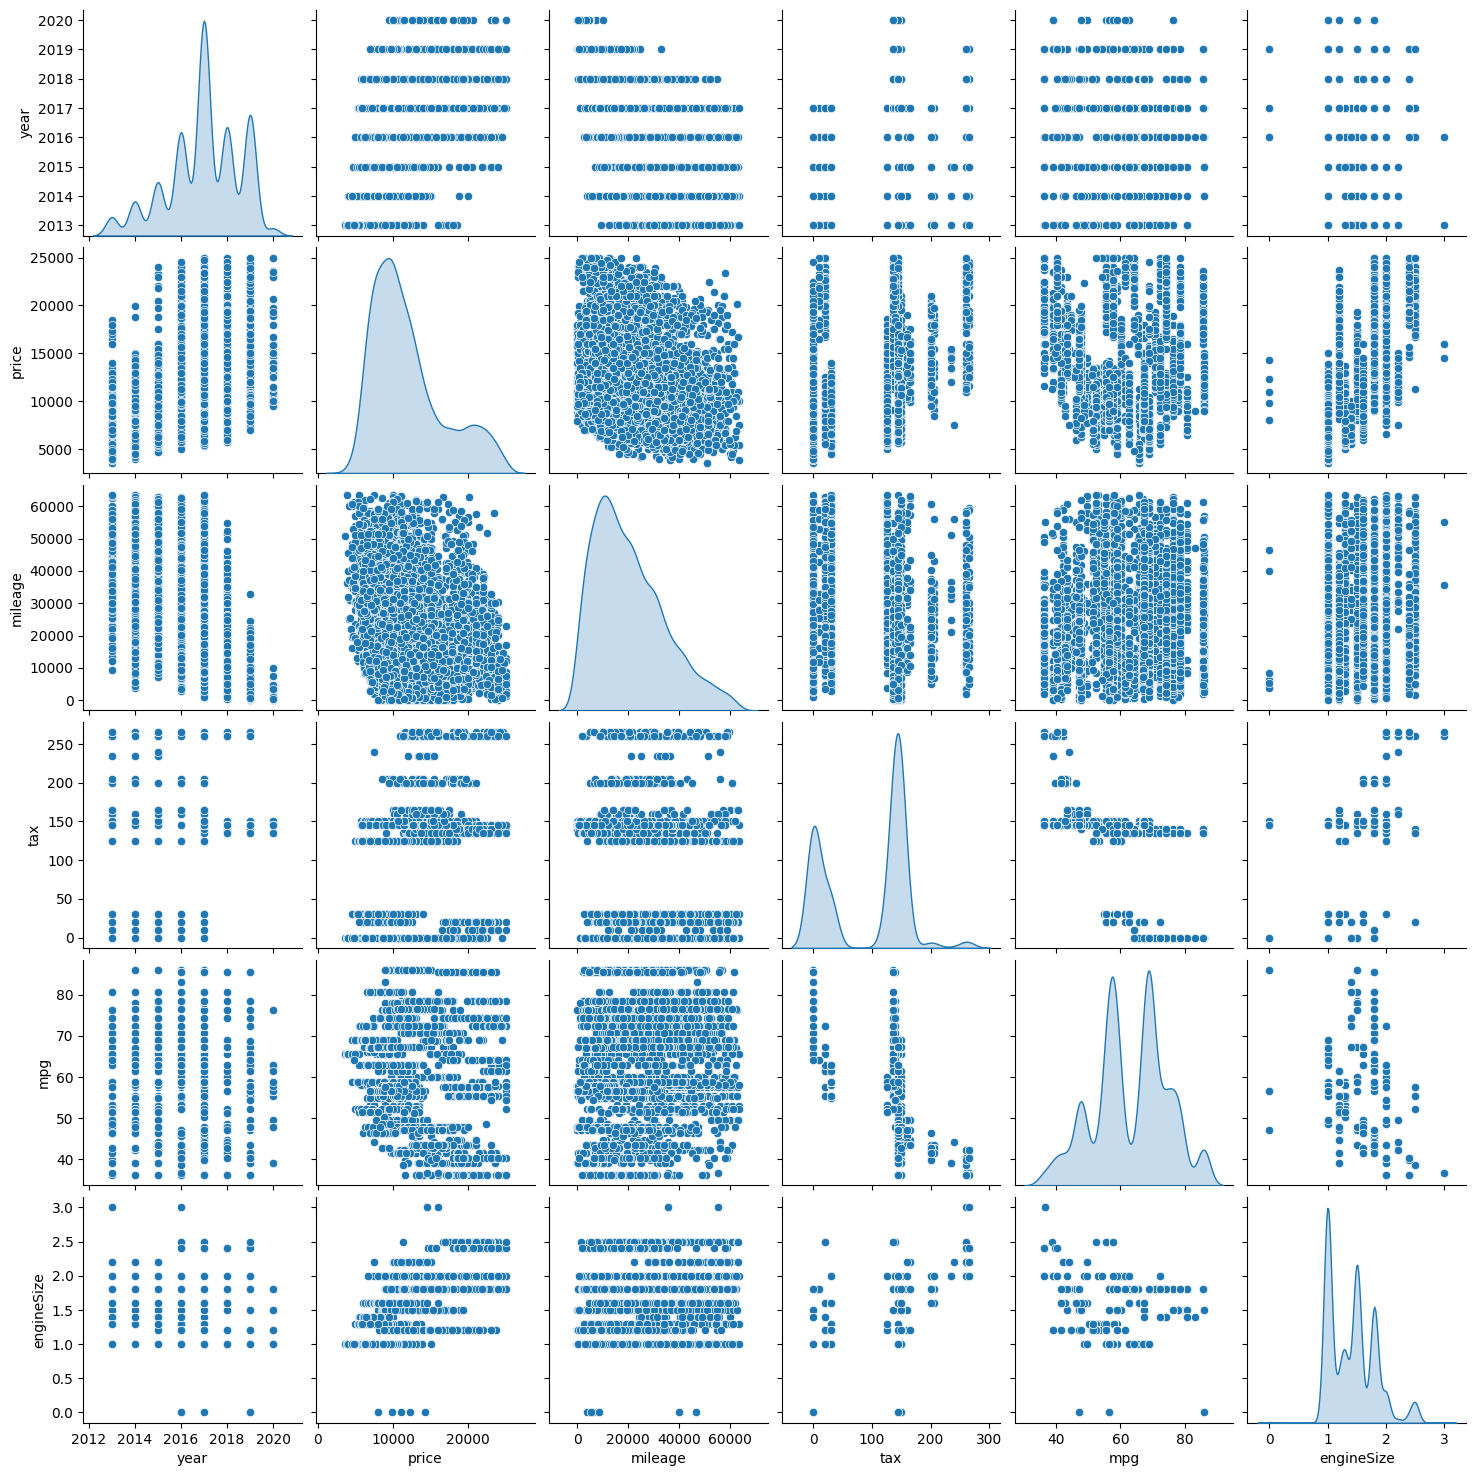

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind="kde")

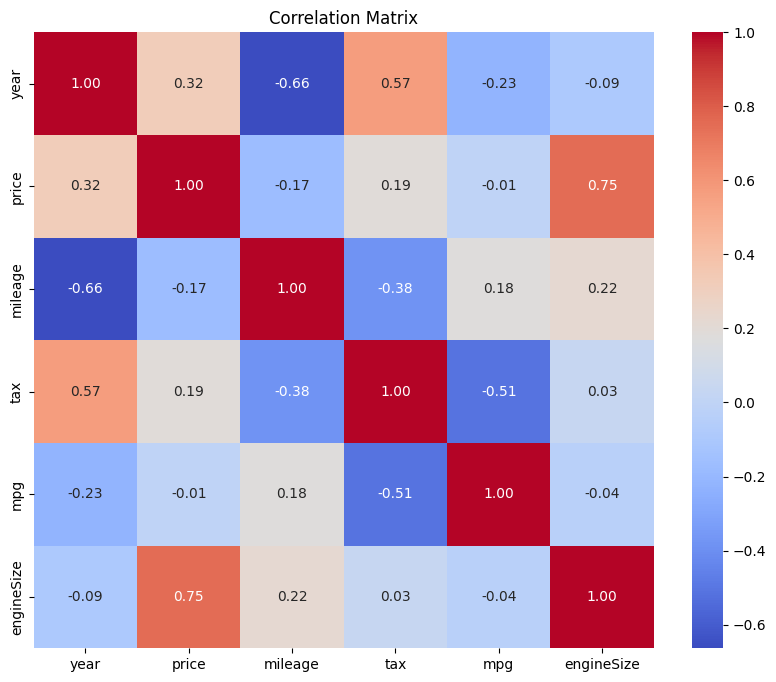

In [15]:
# Correlation Matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Data Preparation**


In [16]:
categorical_features

['model', 'transmission', 'fuelType']

In [17]:
df = pd.concat([df, pd.get_dummies(df["model"], prefix="model")], axis=1)
df = pd.concat([df, pd.get_dummies(df["transmission"], prefix="transmission")], axis=1)
df = pd.concat([df, pd.get_dummies(df["fuelType"], prefix="fuelType")], axis=1)
df.drop(["model", "transmission", "fuelType"], axis=1, inplace=True)
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2017,15995,18615,145,36.2,2.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2015,13998,27469,265,36.2,2.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2017,18998,14736,150,36.2,2.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2017,17498,36284,145,36.2,2.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [19]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 6015
Total # of sample in train dataset: 4812
Total # of sample in test dataset: 1203


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features in the training set and transform them
X_train = scaler.fit_transform(X_train)

# Transform the numerical features in the test set using the scaler fitted on the training set
X_test = scaler.transform(X_test)

# **Model Development**


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred_rf = rf_model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

# Mencetak hasil evaluasi
print("R^2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R^2:  0.9577855951024232
MSE:  982739.302731768
MAE:  720.4839662831857


# **Genetic Algorithm**

In [24]:
import pygad
from numpy.random import RandomState

In [25]:
seed = 1234
state = RandomState(seed)

In [26]:
def fitness_func(ga_instance, solution, solution_idx):
    n_estimators = solution[0]
    max_depth = solution[1]
    max_features = solution[2]
    min_samples_split = solution[3]
    min_samples_leaf = solution[4]

    rf_model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        max_features=int(max_features),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42,
    )
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    r2 = r2_score(y_test, predictions)

    return r2

In [27]:
def on_generation(ga_instance):
    global last_fitness
    print(
        "Generation = {generation}".format(generation=ga_instance.generations_completed)
    )
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print(
        "Best Solution    = {solution}".format(solution=ga_instance.best_solution()[0])
    )
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")

    last_fitness = ga_instance.best_solution()[1].copy()

In [28]:
last_fitness = 0
num_generations = 50
num_parents_mating = 4
sol_per_pop = 8
num_genes = 5
gene_space = [
    {"low": 50, "high": 550, "step": 50},  # n_estimators
    {"low": 5, "high": 55, "step": 5},  # max_depth
    {"low": 1, "high": 11},  # max_features
    {"low": 2, "high": 11},  # min_samples_split
    {"low": 1, "high": 11},  # min_samples_leaf
]

In [29]:
# Initialize the GA
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_type=[int, int, int, int, int],
                       gene_space=gene_space,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       suppress_warnings=True)

In [30]:
# Jalankan optimasi GA
ga_instance.run()

Generation = 1
Fitness    = 0.9643612039742852
Best Solution    = [500 20 10 2 3]
Change     = 0.9643612039742852
Generation = 2
Fitness    = 0.9643612039742852
Best Solution    = [500 20 10 2 3]
Change     = 0.0
Generation = 3
Fitness    = 0.9643612039742852
Best Solution    = [500 20 10 2 3]
Change     = 0.0
Generation = 4
Fitness    = 0.9646861828282365
Best Solution    = [500 10 10 2 3]
Change     = 0.00032497885395132986
Generation = 5
Fitness    = 0.9646861828282365
Best Solution    = [500 10 10 2 3]
Change     = 0.0
Generation = 6
Fitness    = 0.9653936834968582
Best Solution    = [500 10 10 2 2]
Change     = 0.0007075006686216856
Generation = 7
Fitness    = 0.9653936834968582
Best Solution    = [500 10 10 2 2]
Change     = 0.0
Generation = 8
Fitness    = 0.9653936834968582
Best Solution    = [500 10 10 2 2]
Change     = 0.0
Generation = 9
Fitness    = 0.9659206437399446
Best Solution    = [500 10 10 2 1]
Change     = 0.0005269602430864051
Generation = 10
Fitness    = 0.96592064

In [31]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best solution : {solution}".format(solution=solution))
print(
    "Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness
    )
)
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print(
        "Best fitness value reached after {best_solution_generation} generations.".format(
            best_solution_generation=ga_instance.best_solution_generation
        )
    )

best solution : [150 10 10 2 1]
Fitness value of the best solution = 0.9661697623300876
Index of the best solution : 0
Best fitness value reached after 15 generations.


In [32]:
# Bangun dan latih model RF dengan parameter yang dioptimalkan
best_rf_model = RandomForestRegressor(
    n_estimators=solution[0],
    max_depth=solution[1],
    max_features=solution[2],
    min_samples_split=solution[3],
    min_samples_leaf=solution[4],
    random_state=42,
)
best_rf_model.fit(X_train, y_train)

# Prediksi harga mobil bekas dengan model RF yang telah dioptimalkan
best_predictions = best_rf_model.predict(X_test)

In [33]:
r2_best = r2_score(y_test, best_predictions)
mse_best = mean_squared_error(y_test, best_predictions)
mae = mean_absolute_error(y_test, y_pred_rf)

print("r2: ", r2_best)
print("mse: ", mse_best)
print("MAE: ", mae_best)

r2:  0.9661697623300876
mse:  787558.281578149


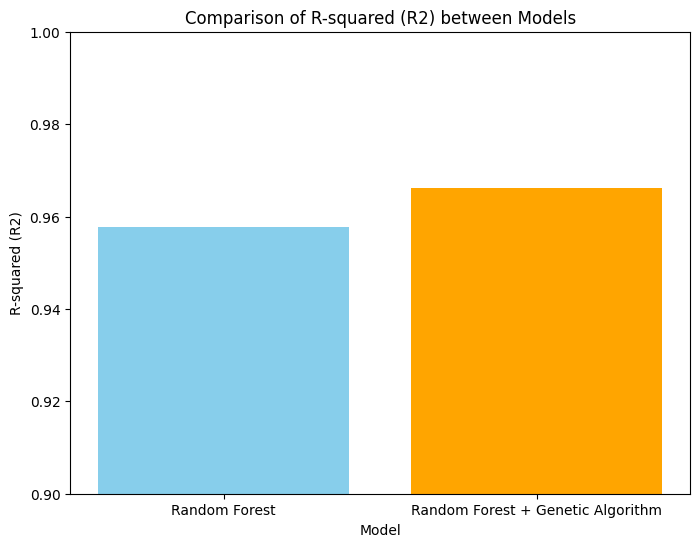

In [34]:
# Set up the data
models = ["Random Forest", "Random Forest + Genetic Algorithm"]
r2_values = [r2, r2_best]

# Create the bar plot for R-squared
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=["skyblue", "orange"])
plt.xlabel("Model")
plt.ylabel("R-squared (R2)")
plt.title("Comparison of R-squared (R2) between Models")
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()

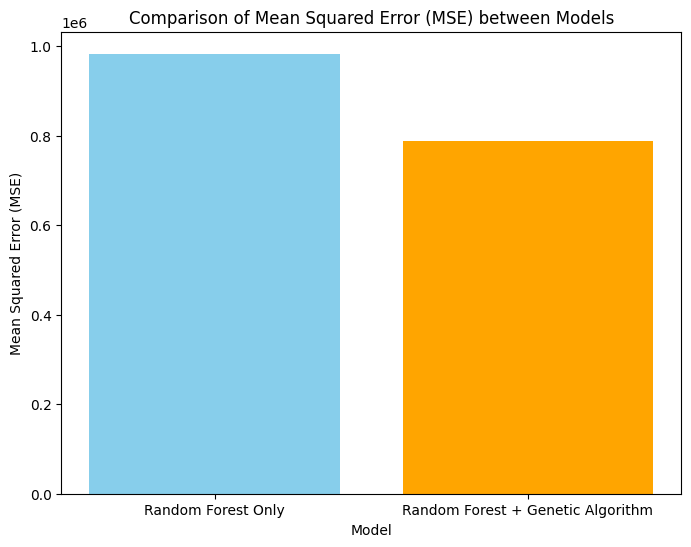

In [35]:
# Set up the data
models = ["Random Forest Only", "Random Forest + Genetic Algorithm"]
mse_values = [mse, mse_best]

# Create the bar plot for Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=["skyblue", "orange"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Mean Squared Error (MSE) between Models")
plt.show()